In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
data = pd.read_csv('movie.csv')
data.head(6)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [6]:
data['label'].value_counts()

label
0    20019
1    19981
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

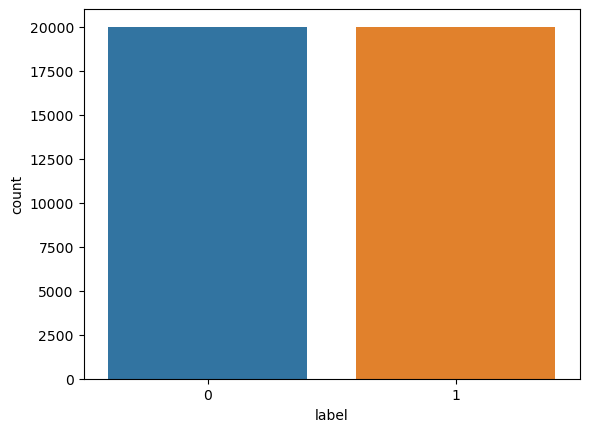

In [7]:
plt.figure()
sns.countplot(x=data.label)

In [13]:
data['text'][10000]

'All this dismaying waste of film stock needs is Count Floyd popping up every sixty seconds. Somehow they got Steve Railsback, Susan Anspach, John Vernon, and Joe Flaherty together on a set and couldn\'t get within five miles, about eight kilometers, of an actual movie. BOY does this thing suck. There isn\'t one original line, thought, shot, or effect from brainless opening sequence to brainless close. The magical, ethereal Susan Anspach of Five Easy Pieces - boring. Steve Railsback - boring. John Vernon - boring. The big bug - boring. If this is a scary movie, Buttercream Gang is a thuglife documentary. <br /><br />Seriously - every bad movie contains its own explanation of its badness. Usually it\'s in the opening credits - "Written, Directed, and Produced by" one guy. Or at the very center of the action is some bimbo so talentless that you know there\'s one and only one reason this turkey got made. Here, you don\'t find out till the very last of the credits, where the cooperation of

In [14]:
X = data['text']
y = data['label']

In [16]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = pad_sequences(tokenizer.texts_to_sequences(X), maxlen=200)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

model.build(input_shape=(None, 200))

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 60s 145ms/step - accuracy: 0.7193 - loss: 0.5360 - val_accuracy: 0.8175 - val_loss: 0.4123
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 57s 141ms/step - accuracy: 0.8520 - loss: 0.3505 - val_accuracy: 0.8191 - val_loss: 0.4023
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 57s 142ms/step - accuracy: 0.8615 - loss: 0.3298 - val_accuracy: 0.8256 - val_loss: 0.4169
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 56s 140ms/step - accuracy: 0.8870 - loss: 0.2827 - val_accuracy: 0.8537 - val_loss: 0.3631
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 57s 142ms/step - accuracy: 0.8948 - loss: 0.2584 - val_accuracy: 0.8497 - val_loss: 0.3760


In [40]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.8495 - loss: 0.3679
Test Loss: 0.3596155345439911
Test Accuracy: 0.8519999980926514


In [41]:
def predict_sentiment(review):
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [49]:
new_review = "i loved it"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The sentiment of the review is: positive


In [51]:
new_review = "movie is not that good"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The sentiment of the review is: negative


In [57]:
import pickle

model.save('model.h5')

In [58]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)